## SGD

In [ ]:
"""
# Stochastic Gradient Descent (SGD) in Linear Regression

## Overview
Stochastic Gradient Descent (SGD) is an optimization algorithm commonly used in machine learning, particularly for training models like linear regression. It is a variant of the traditional gradient descent method, which updates model parameters iteratively to minimize a loss function.

## How SGD Works
1. **Initialization**:
   - Start with random values for the model parameters (weights and bias).
   - Define the learning rate, which controls the size of the steps taken towards the minimum of the loss function.

2. **Iterative Updates**:
   - For each iteration, randomly select a single training example (or a small batch).
   - Compute the predicted output using the current model parameters.
   - Calculate the error (difference between predicted and actual output).
   - Compute the gradient of the loss function with respect to the model parameters.
   - Update the model parameters by moving them in the opposite direction of the gradient, scaled by the learning rate.

3. **Convergence**:
   - Repeat the process for a specified number of iterations or until the change in the loss function is below a certain threshold.

## Uses of SGD in Machine Learning
- **Efficiency**: SGD is particularly useful for large datasets, as it updates parameters more frequently than traditional gradient descent, leading to faster convergence.
- **Online Learning**: It is suitable for online learning scenarios where data arrives in streams, allowing the model to update continuously.
- **Regularization**: The inherent noise in SGD can help prevent overfitting by introducing randomness in the updates.

## Limitations of SGD
- **Noisy Updates**: The randomness in selecting training examples can lead to noisy updates, causing the optimization path to oscillate and potentially overshoot the minimum.
- **Tuning Required**: The performance of SGD is sensitive to the choice of learning rate. A learning rate that is too high can lead to divergence, while one that is too low can result in slow convergence.
- **Local Minima**: SGD may get stuck in local minima, especially in non-convex loss landscapes.

## Comparison with Batch Gradient Descent
- **Dataset Usage**:
  - **SGD**: Uses a single sample or a small batch for each update.
  - **Batch Gradient Descent**: Uses the entire dataset for each update.

- **Computational Efficiency**:
  - **SGD**: More computationally efficient per iteration, especially for large datasets.
  - **Batch Gradient Descent**: More computationally expensive as it processes the entire dataset.

- **Convergence**:
  - **SGD**: Faster convergence due to frequent updates but can be less stable.
  - **Batch Gradient Descent**: More stable convergence but slower due to less frequent updates.

"""


Iteration 1: Loss = 8.348398691170772
Iteration 101: Loss = 2.9270739549890767
Iteration 201: Loss = 0.723948379471082
Iteration 301: Loss = 0.423538489652327
Iteration 401: Loss = 0.1511023499309252
Iteration 501: Loss = 0.06540574442201307
Iteration 601: Loss = 0.18316627144176045
Iteration 701: Loss = 0.02388370403605429
Iteration 801: Loss = 0.01578204289083302
Iteration 901: Loss = 0.09274079177500666
Iteration 1001: Loss = 0.022056456624804786
Iteration 1101: Loss = 0.15691596013974826
Iteration 1201: Loss = 0.019834185817515778
Iteration 1301: Loss = 0.05537764550445327
Iteration 1401: Loss = 0.13723086008461408
Iteration 1501: Loss = 0.00686162085424539
Iteration 1601: Loss = 0.01678389613343477
Iteration 1701: Loss = 0.012490620205130426
Iteration 1801: Loss = 0.006147593820025118
Iteration 1901: Loss = 0.00948213163117693
Iteration 2000: Loss = 0.003689426129863661
Final weights: [2.42545763 2.19606772]


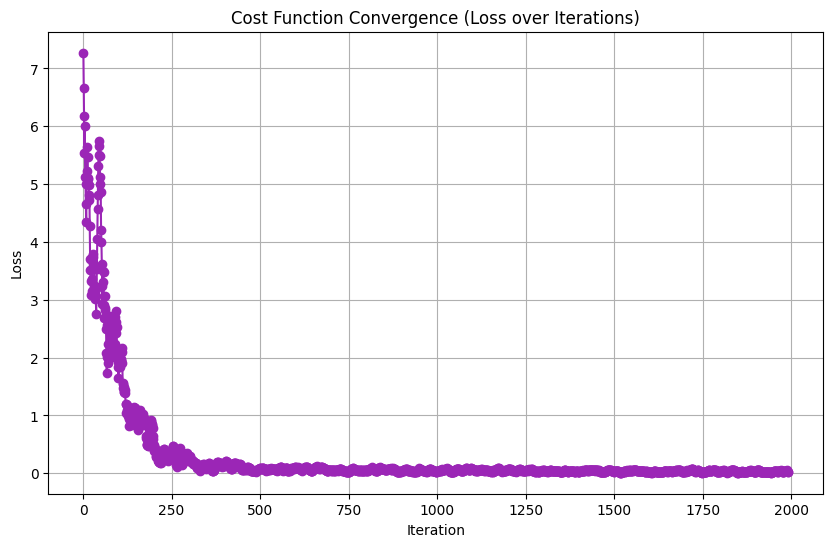

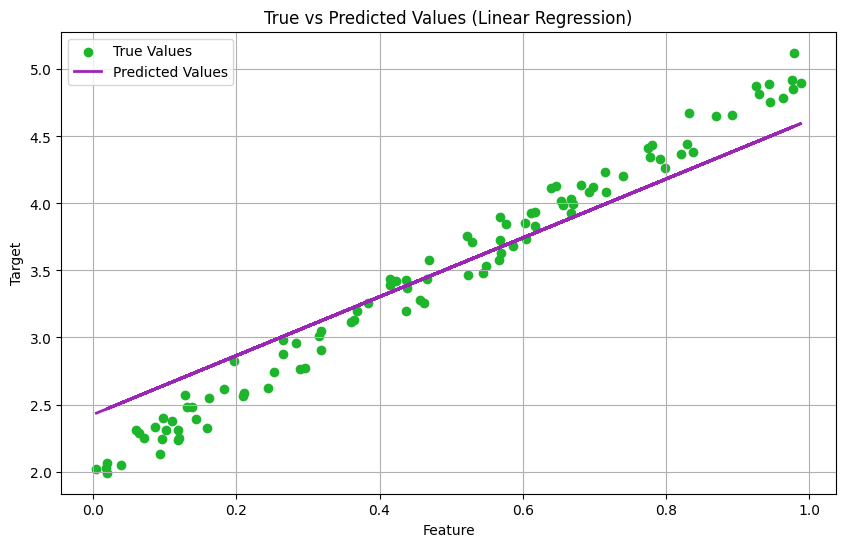

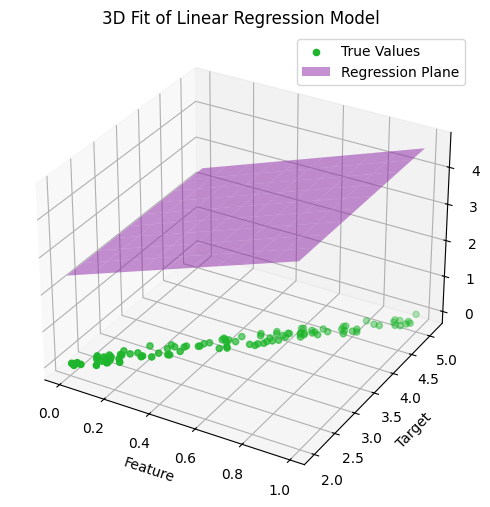

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class SGDLinearRegression:
    def __init__(self, learning_rate=0.01, max_iterations=1000):
        """
        Initialize the model with a specified learning rate and maximum number of iterations.
        """
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.weights = None
        self.loss_history = []  # To store loss values for plotting

    def fit(self, X, Y):
        """
        Train the model using stochastic gradient descent.
        """
        num_samples, num_features = X.shape
        self.weights = np.zeros((num_features, 1))  # Initialize weights to zero

        for iteration in range(self.max_iterations):
            # Select a random sample for stochastic gradient descent
            random_index = np.random.randint(num_samples)
            x_i = X[random_index].reshape(-1, 1)
            y_i = Y[random_index]

            y_pred = x_i.T @ self.weights
            error = y_i - y_pred  # Compute the error

            gradient = x_i * error
            self.weights += self.learning_rate * gradient

            loss = 0.5 * error ** 2
            self.loss_history.append(loss[0][0])

            if iteration % 100 == 0 or iteration == self.max_iterations - 1:
                print(f"Iteration {iteration + 1}: Loss = {loss[0][0]}")

    def predict(self, X):
        """
        Predict values using the learned weights.
        """
        return X @ self.weights

# Plotting functions
def plot_loss_convergence(loss_history):
    """
    Plot the loss over iterations to visualize convergence.
    """
    plt.figure(figsize=(10, 6))
    smoothed_loss = np.convolve(loss_history, np.ones(10)/10, mode='valid')
    plt.plot(range(1, len(smoothed_loss) + 1), smoothed_loss, color='#9B26B6', marker='o')
    plt.title('Cost Function Convergence (Loss over Iterations)')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

def plot_true_vs_predicted(X, Y, Y_pred):
    """
    Plot the actual vs predicted values.
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 1], Y, color='#1DB52B', label='True Values')
    plt.plot(X[:, 1], Y_pred, color='#9B26B6', label='Predicted Values', linewidth=2)
    plt.title('True vs Predicted Values (Linear Regression)')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_3d_fit(X, Y, model):

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X[:, 1], Y, color='#1DB52B', label='True Values')
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
    ax.set_zlabel('Predicted Target')

    x_range = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 10)
    y_range = np.linspace(np.min(Y), np.max(Y), 10)
    X_mesh, Y_mesh = np.meshgrid(x_range, y_range)

    X_mesh_flat = X_mesh.flatten()
    X_mesh_flat = np.hstack((np.ones((X_mesh_flat.shape[0], 1)), X_mesh_flat.reshape(-1, 1)))

    Z_mesh = model.predict(X_mesh_flat)
    Z_mesh = Z_mesh.reshape(X_mesh.shape)

    ax.plot_surface(X_mesh, Y_mesh, Z_mesh, color='#9B26B6', alpha=0.5, label='Regression Plane')

    plt.title('3D Fit of Linear Regression Model')
    plt.legend()
    plt.show()

# Example
if __name__ == "__main__":
    # Generate synthetic data for testing
    np.random.seed(0)
    num_samples = 100
    X = np.random.rand(num_samples, 1)
    X = np.hstack((np.ones((num_samples, 1)), X))  # Add bias term
    true_weights = np.array([[2.0], [3.0]])
    Y = X @ true_weights + np.random.normal(0, 0.1, (num_samples, 1))  # Add noise

    # Train the SGD linear regression model
    model = SGDLinearRegression(learning_rate=0.005, max_iterations=2000)
    model.fit(X, Y)

    # Predict values
    Y_pred = model.predict(X)

    # Display the final weights
    print("Final weights:", model.weights.flatten())

    # Plot the results
    plot_loss_convergence(model.loss_history)
    plot_true_vs_predicted(X, Y, Y_pred)
    plot_3d_fit(X, Y, model)
